<a href="https://colab.research.google.com/github/sophie-goodman/CMPE351Project/blob/main/RQ2_RQ3_Code_CMPE372DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import glob

# Concatenate all CSV files into one df
reviews_path = '/content/drive/MyDrive/CMPE372Project/reviews_Tor.csv'
listings_path = '/content/drive/MyDrive/CMPE372Project/listings_Tor.csv'

reviews_toronto = pd.read_csv(reviews_path)
listings_toronto = pd.read_csv(listings_path)
print(reviews_toronto.head(5))
print(listings_toronto.head(5))


   listing_id         id        date  reviewer_id reviewer_name  \
0        1419   38924112  2015-07-19     11308465       Marcela   
1        1419   44791978  2015-08-29      9580285         Marco   
2        1419   45957133  2015-09-07     38394721        Andrea   
3        1419   67295154  2016-03-28      3515044         Shaun   
4        1419  177702208  2017-08-03     13987100          Kate   

                                            comments  
0  Having the opportunity of arriving to Alexandr...  
1  We have no enough words to describe how beauty...  
2  The listing was exceptional and an even better...  
3  Alexandra's home was amazing and in such a nea...  
4  Beautiful home. Very comfortable and clean. Pe...  
             id                                       listing_url  \
0  2.401877e+07             https://www.airbnb.com/rooms/24018771   
1  5.068010e+07             https://www.airbnb.com/rooms/50680103   
2  1.018845e+18  https://www.airbnb.com/rooms/10188452239857

In [ ]:
#dropping unnessary columns
columns_to_drop = ['listing_url', 'source','picture_url', 'host_url', 'host_thumbnail_url',
                    'host_picture_url', 'host_name','host_since','host_location','host_response_time',
                   'host_listings_count','host_total_listings_count','host_identity_verified','host_has_profile_pic', 'amenities',
                   'property_type', 'bathrooms_text','number_of_reviews_l30d','first_review','last_review',''
                   'license', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed','scrape_id',
                   'neighbourhood_group_cleansed', 'bathrooms', 'bedrooms', 'calendar_updated', 'minimum_nights',
                   'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                   'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
                   'availability_30','availability_60','availability_90','availability_365','number_of_reviews_ltm',
                   'calendar_last_scraped', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                   'last_scraped','instant_bookable']

listings_toronto.drop(columns=columns_to_drop, inplace=True)

#Encode host_is_superhost, clean host_acceptance_rate and host_response_rate have % signs, room_type one-hot encoding,

In [ ]:
columns_to_drop = ['description']
listings_toronto.drop(columns=columns_to_drop, inplace=True)
listings_toronto.describe()
print(listings_toronto)

                 id                                               name  \
0      2.401877e+07  Home in Toronto · ★4.74 · 1 bedroom · 1 bed · ...   
1      5.068010e+07               Boat in Toronto · 1 bedroom · 1 bath   
2      1.018845e+18  Townhouse in Toronto · ★New · 1 bedroom · 1 be...   
3      8.429911e+17  Bed and breakfast in Toronto · ★4.67 · 1 bedro...   
4      1.004966e+18  Home in Toronto · ★4.73 · 1 bedroom · 4 beds ·...   
...             ...                                                ...   
20381  4.374074e+07  Condo in Toronto · ★4.88 · 1 bedroom · 1 bed ·...   
20382  1.469475e+07  Rental unit in Toronto · ★4.92 · 1 bedroom · 1...   
20383  9.551622e+17  Townhouse in Toronto · ★5.0 · 4 bedrooms · 5 b...   
20384  8.944069e+17  Rental unit in Toronto · ★4.51 · 2 bedrooms · ...   
20385  6.164494e+17  Condo in Toronto · ★4.96 · 1 bedroom · 1 bed ·...   

                                   neighborhood_overview    host_id  \
0                                       

In [ ]:
listings_toronto.dropna(inplace=True)
listings_toronto.describe()


,id,host_id,latitude,longitude,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3.766000e+03,3.766000e+03,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000
mean,3.145564e+17,1.393770e+08,43.678189,-79.400130,3.185874,1.775624,53.870420,4.825884,4.845743,4.790921,4.885266,4.897833,4.848008,4.730704,1.572106
std,4.036427e+17,1.612680e+08,0.044825,0.070629,1.995339,1.106710,80.284949,0.277687,0.277610,0.319496,0.248717,0.243035,0.241611,0.334523,1.659436
min,2.665400e+04,2.851500e+04,43.585750,-79.623950,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,2.222988e+07,1.722964e+07,43.646341,-79.433697,2.000000,1.000000,7.000000,4.770000,4.810000,4.710000,4.870000,4.890000,4.800000,4.670000,0.350000
50%,4.515454e+07,6.692486e+07,43.663538,-79.399477,2.000000,1.000000,24.000000,4.900000,4.920000,4.880000,4.950000,4.970000,4.910000,4.800000,0.980000
75%,7.580616e+17,2.101697e+08,43.694253,-79.371530,4.000000,2.000000,66.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.910000,2.310000
max,1.056592e+18,5.508467e+08,43.831460,-79.129560,16.000000,11.000000,1018.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.500000


In [ ]:
#reviews_toronto.drop(columns=['reviewer_name'],inplace=True)
print(reviews_toronto)
columns_to_drop_reviews = ['reviewer_name']
#reviews_toronto.drop(columns=columns_to_drop_reviews, inplace=True)

#Cleaning the dataset to remove the rows with <br/> in the coment row
# Identifying rows containing "<br/>" in the comments column
rows_to_drop = reviews_toronto[reviews_toronto['comments'].str.contains('<br/>', na=False)].index
reviews_toronto.drop(index=rows_to_drop, inplace=True)


print(reviews_toronto)
common_ids = reviews_toronto['listing_id'].isin(listings_toronto['id'])
print("Total number of common IDs:", common_ids.sum())

uncommon_ids = ~(reviews_toronto['listing_id'].isin(listings_toronto['id']))
print("Total number of uncommon IDs:", uncommon_ids.sum())

# Create a boolean mask indicating whether each 'listing_id' in reviews_toronto exists in the 'id' column of listings_toronto
mask = reviews_toronto['listing_id'].isin(listings_toronto['id'])

# Filter reviews_toronto based on the mask
reviews_toronto_filtered = reviews_toronto[mask]

# Optionally, reset the index of the filtered dataframe if needed
reviews_toronto_filtered.reset_index(drop=True, inplace=True)

# Display the filtered dataframe
print(reviews_toronto_filtered)

print(reviews_toronto)
common_ids = reviews_toronto_filtered['listing_id'].isin(listings_toronto['id'])
print("Total number of common IDs:", common_ids.sum())

reviews_toronto = reviews_toronto_filtered.copy()


                 listing_id                   id        date  reviewer_id  \
0                      1419             38924112  2015-07-19     11308465   
1                      1419             44791978  2015-08-29      9580285   
2                      1419             45957133  2015-09-07     38394721   
3                      1419             67295154  2016-03-28      3515044   
4                      1419            177702208  2017-08-03     13987100   
...                     ...                  ...         ...          ...   
511134  1052319083870161124  1060278841405099130  2024-01-02    488503452   
511135  1057929286925165858  1063800272543205518  2024-01-07    116898580   
511136  1053010334213066893  1060237917554723922  2024-01-02    218317215   
511137  1061704502413506115  1063069435771397497  2024-01-06    145523200   
511138  1053372809437539904  1058023623375101389  2023-12-30    334645233   

       reviewer_name                                           comments  
0

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


# Using code from InstructABSA - UPDATE THIS

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy
import numpy as np

# Load a pre-trained language model,
nlp = spacy.load('en_core_web_md')  # Load the English tokenizer, tagger, parser, and NER

# Function to filter comments based on token length
def filter_comments(comment):
    if isinstance(comment, str):
        # Tokenize the comment
        doc = nlp(comment)
        # Check the number of tokens
        if len(doc) < 512:
            return comment
    return None

# Apply the filter_comments function to the 'comments' column
reviews_toronto['comments'] = reviews_toronto['comments'].apply(filter_comments)

# Drop rows where comments are None (token length >= 512)
reviews_toronto.dropna(subset=['comments'], inplace=True)

# Reset the index if needed
reviews_toronto.reset_index(drop=True, inplace=True)
# Get the number of rows in the dataframe
num_rows = reviews_toronto.shape[0]

# Print the number of rows
print("Number of rows in the dataset:", num_rows)

tokenizer = AutoTokenizer.from_pretrained("kevinscaria/joint_tk-instruct-base-def-pos-neg-neut-restaurants")
model = AutoModelForSeq2SeqLM.from_pretrained("kevinscaria/joint_tk-instruct-base-def-pos-neg-neut-restaurants")

bos_instruction = """Definition: The output will be the aspects (both implicit and explicit) and the aspects sentiment polarity. In cases where there are no aspects the output should be noaspectterm:none.
    Positive example 1-
    input: Location was fantastic.
    output: location:positive,
    Positive example 2-
    input: The apartment was clean and bright, it was a perfect experience!
    output: apartment:positive, experience:positive
    Negative example 1-
    input: The apartment is very bad.
    output: apartment:negative
    Negative example 2-
    input: Communication with host was impossible.
    output: communication:negative
    Now complete the following example-
    input: """
delim_instruct = ''
eos_instruct = ' \noutput:'

# Predefined category centroids (example words for each category)
categories = {
    'location': ['neighbourhood', 'area', 'accessibility', 'view', 'proximity'],
    'cleanliness': ['maintainance', 'neat', 'hygiene', 'bathroom', 'kitchen'],
    'accuracy' : ['size', 'apartment', 'stay', 'house', 'room'],
    'check-in' : ['reception', 'ease of access'],
    'communication' : ['host', 'responsiveness', 'clarity', 'helpfulness'],
    'value' : ['price', 'cost' ]
}

# Calculate centroid vectors for each category
centroids = {}
for category, words in categories.items():
    # Compute the mean vector for the given words
    centroid = np.mean([nlp(word).vector for word in words], axis=0)
    centroids[category] = centroid

# Function to classify a new word
def classify_word(word):
    word_vec = nlp(word).vector
    # Calculate distances to each centroid
    distances = {category: np.linalg.norm(word_vec - centroid) for category, centroid in centroids.items()}
    # Return the category with the minimum distance
    return min(distances, key=distances.get)

# Assuming you have initialized `results` as an empty list and defined `tokenizer`, `model`, and `reviews_toronto` earlier

results = []

count = 0

for index, row in reviews_toronto.head(12000).iterrows():
    text = row['comments']  # Get the comment text
    listing_id = row['listing_id']  # Get the listing_id associated with the review
    # Tokenize the text
    tokenized_text = tokenizer(bos_instruction + text + delim_instruct + eos_instruct, return_tensors="pt")
    # Generate model output
    output = model.generate(tokenized_text.input_ids)
    # Decode the model output
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

    print("Line :" , count)
    count +=1

    # Extract aspects and classify them into categories
    aspects = decoded_output.split(', ')
    aspect_categories = {}
    for category in categories.keys():
        aspect_categories[category] = -1  # Initialize all aspects as not extracted
    for aspect in aspects:
        word = aspect.split(':')[0].strip()
        category = classify_word(word)
        if 'positive' in aspect:
            aspect_categories[category] = 1
        else:
            aspect_categories[category] = 0

    # Append the comment, model output, and aspect categories to the results list
    results.append({'listing_id': listing_id, 'Comment': text, 'decoded_model_output': decoded_output, **aspect_categories})

# Create DataFrame from results list

# Create DataFrame from results list
results_df = pd.DataFrame(results)


Number of rows in the dataset: 161532


tokenizer_config.json:   0%|          | 0.00/2.57k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Line : 0
Line : 1
Line : 2
Line : 3
Line : 4
Line : 5
Line : 6
Line : 7
Line : 8
Line : 9
Line : 10
Line : 11
Line : 12
Line : 13
Line : 14
Line : 15
Line : 16
Line : 17
Line : 18
Line : 19
Line : 20
Line : 21
Line : 22
Line : 23
Line : 24
Line : 25
Line : 26
Line : 27
Line : 28
Line : 29
Line : 30
Line : 31
Line : 32
Line : 33
Line : 34
Line : 35
Line : 36
Line : 37
Line : 38
Line : 39
Line : 40
Line : 41
Line : 42
Line : 43
Line : 44
Line : 45
Line : 46
Line : 47
Line : 48
Line : 49
Line : 50
Line : 51
Line : 52
Line : 53
Line : 54
Line : 55
Line : 56
Line : 57
Line : 58
Line : 59
Line : 60
Line : 61
Line : 62
Line : 63
Line : 64
Line : 65
Line : 66
Line : 67
Line : 68
Line : 69
Line : 70
Line : 71
Line : 72
Line : 73
Line : 74
Line : 75
Line : 76
Line : 77
Line : 78
Line : 79
Line : 80
Line : 81
Line : 82
Line : 83
Line : 84
Line : 85
Line : 86
Line : 87
Line : 88
Line : 89
Line : 90
Line : 91
Line : 92
Line : 93
Line : 94
Line : 95
Line : 96
Line : 97
Line : 98
Line : 99
Line : 100

Token indices sequence length is longer than the specified maximum sequence length for this model (525 > 512). Running this sequence through the model will result in indexing errors


Streaming output truncated to the last 5000 lines.
Line : 7000
Line : 7001
Line : 7002
Line : 7003
Line : 7004
Line : 7005
Line : 7006
Line : 7007
Line : 7008
Line : 7009
Line : 7010
Line : 7011
Line : 7012
Line : 7013
Line : 7014
Line : 7015
Line : 7016
Line : 7017
Line : 7018
Line : 7019
Line : 7020
Line : 7021
Line : 7022
Line : 7023
Line : 7024
Line : 7025
Line : 7026
Line : 7027
Line : 7028
Line : 7029
Line : 7030
Line : 7031
Line : 7032
Line : 7033
Line : 7034
Line : 7035
Line : 7036
Line : 7037
Line : 7038
Line : 7039
Line : 7040
Line : 7041
Line : 7042
Line : 7043
Line : 7044
Line : 7045
Line : 7046
Line : 7047
Line : 7048
Line : 7049
Line : 7050
Line : 7051
Line : 7052
Line : 7053
Line : 7054
Line : 7055
Line : 7056
Line : 7057
Line : 7058
Line : 7059
Line : 7060
Line : 7061
Line : 7062
Line : 7063
Line : 7064
Line : 7065
Line : 7066
Line : 7067
Line : 7068
Line : 7069
Line : 7070
Line : 7071
Line : 7072
Line : 7073
Line : 7074
Line : 7075
Line : 7076
Line : 7077
Line : 7078
L

In [ ]:
print(results_df)
results_df.to_csv('results_data.csv', index=False)


       listing_id                                            Comment  \
0           50110  Excellent location, friendly people, very clea...   
1           50110  Wonderful location, easy access by subway, gor...   
2           50110  I had a great and comfortable stay in this con...   
3           50110  I stayed 2 nights in apartment 1614 and was ve...   
4           50110  Sam was a very helpful guy. My colleagues and ...   
...           ...                                                ...   
11995     4565516  A great host, Calvin stayed in touch to ensure...   
11996     4565516  Was in town for a quick visit - a great locati...   
11997     4565516  Calvin was an excellent host.  I have only goo...   
11998     4565516  Such a great location and host. The condo was ...   
11999     4565516  Calvin was very responsive and helpful. The co...   

                                    decoded_model_output  location  \
0      location:positive, people:positive, apartment:...         

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


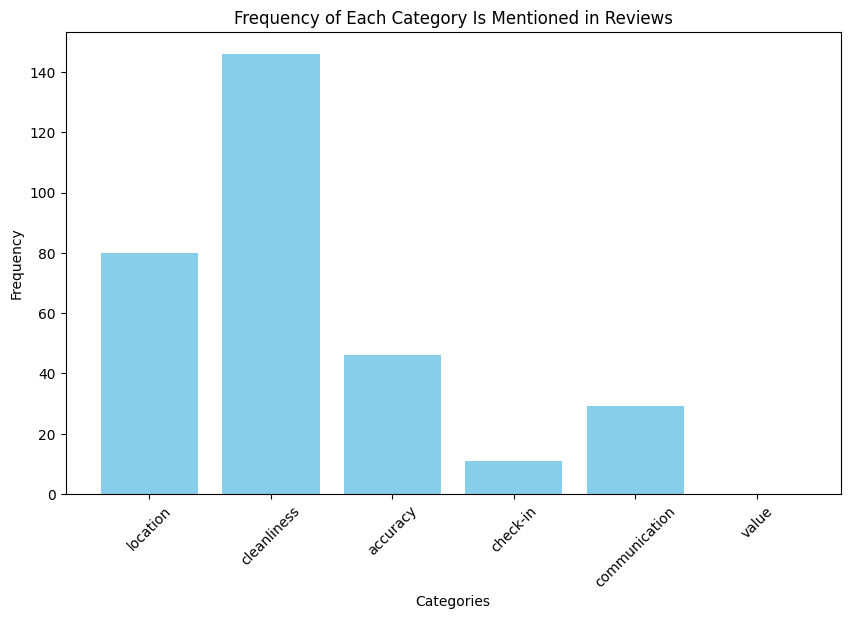

In [ ]:
#CODE TO ANSWER RQ2
!pip install -U spacy
!python -m spacy download en_core_web_md

import re
import pandas as pd
import numpy as np
import spacy
from collections import Counter
import matplotlib.pyplot as plt
nlp = spacy.load('en_core_web_md')  # Load the English tokenizer, tagger, parser, and NER

# Path to the results data file
results_path = '/content/drive/MyDrive/CMPE372Project/results_data_RQ2.csv'

# Read the results data into a DataFrame
results_RQ2 = pd.read_csv(results_path)

categories = {
    'location': ['neighbourhood', 'area', 'accessibility', 'view', 'proximity'],
    'cleanliness': ['maintainance', 'neat', 'hygiene', 'bathroom', 'kitchen'],
    'accuracy' : ['size', 'apartment', 'stay', 'house', 'room'],
    'check-in' : ['reception', 'ease of access'],
    'communication' : ['host', 'responsiveness', 'clarity', 'helpfulness'],
    'value' : ['price', 'cost' ]
}

# Calculate centroid vectors for each category
centroids = {}
for category, words in categories.items():
    # Compute the mean vector for the given words
    centroid = np.mean([nlp(word).vector for word in words], axis=0)
    centroids[category] = centroid

# Function to extract raw aspects from model output
def extract_raw_aspects(decoded_output):
    # No need to split decoded output since it's already a string
    aspects = decoded_output.split(', ')  # Split string into aspects
    raw_aspects = []
    # Extract raw aspects without sentiment
    for aspect in aspects:
        raw_aspect = re.sub(r':[a-z]+', '', aspect).strip()
        raw_aspects.append(raw_aspect)
    return raw_aspects



# Function to classify and count aspects
def classify_and_count(raw_aspects):
    aspect_counts = {category: 0 for category in categories}

    for aspects in raw_aspects:  # Iterate through each list of aspects
        for aspect in aspects:
            if ':' in aspect:
                # Split the aspect by ':' and take the first element as the key
                key = aspect.split(':')[0]
                category = classify_word(key)
                aspect_counts[category] += 1

    return aspect_counts



# Function to classify a new word
def classify_word(word):
    word_vec = nlp(word).vector
    # Calculate distances to each centroid
    distances = {category: np.linalg.norm(word_vec - centroid) for category, centroid in centroids.items()}
    # Return the category with the minimum distance
    return min(distances, key=distances.get)

# Apply the function to extract raw aspects
results_RQ2['raw_aspects'] = results_RQ2['decoded_model_output'].apply(extract_raw_aspects)

# Count the occurrences of each category
aspect_counts = classify_and_count(results_RQ2['raw_aspects'])

# Plot the frequency of each category
plt.figure(figsize=(10, 6))
plt.bar(aspect_counts.keys(), aspect_counts.values(), color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category Is Mentioned in Reviews')
plt.xticks(rotation=45)
plt.show()

# Process raw aspects to create bag of words
bag_of_words = Counter()
for raw_aspects in results_RQ2['raw_aspects']:
    bag_of_words.update(raw_aspects)

# Create DataFrame for bag of words
bag_of_words_df = pd.DataFrame(bag_of_words.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
bag_of_words_df = bag_of_words_df.sort_values(by='Frequency', ascending=False)


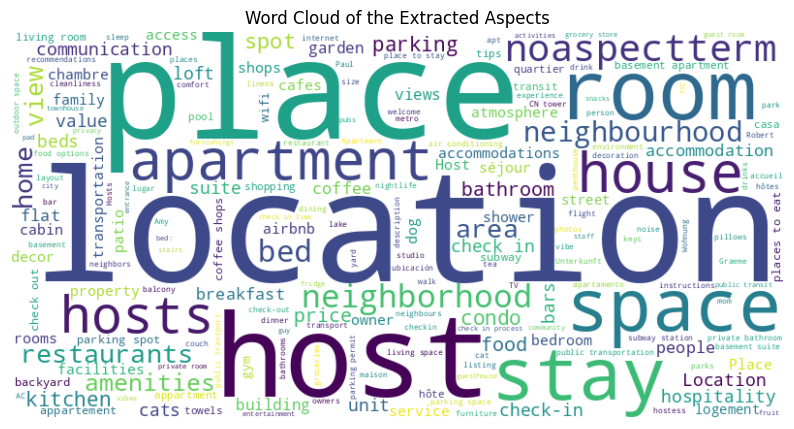

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud from the bag of words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bag_of_words)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of the Extracted Aspects')
plt.show()


In [ ]:
# MAAHUMS DATA VISUALIZATION WORK pls dont delete

# Perform left join on result_data and listings_toronto
# Merge the two dataframes on 'listing_id' and 'id'


# Select the desired columns and create a new dataframe
geo_results_df = pd.merge(results_df, listings_toronto[['id', 'latitude', 'longitude']], left_on='listing_id', right_on='id', how='left')

# Drop the redundant 'id' column from listings_Toronto
geo_results_df.drop(columns='id', inplace=True)
# Display the new dataframe
print(geo_results_df)
#results_with_coords = pd.merge(results_df, listings_toronto[['id', 'longitude', 'latitude']], left_on='listing_id', right_on='id', how='left')
#common_ids = set(results_with_coords['listing_id']).intersection(set(listings_toronto['id']))
#print("Number of common IDs:", len(common_ids))



# Print the resulting DataFrame
#print(results_df.head())
#print(listings_toronto.head())
#print(results_with_coords.head())

       listing_id                                            Comment  \
0           50110  Excellent location, friendly people, very clea...   
1           50110  Wonderful location, easy access by subway, gor...   
2           50110  I had a great and comfortable stay in this con...   
3           50110  I stayed 2 nights in apartment 1614 and was ve...   
4           50110  Sam was a very helpful guy. My colleagues and ...   
...           ...                                                ...   
11995     4565516  A great host, Calvin stayed in touch to ensure...   
11996     4565516  Was in town for a quick visit - a great locati...   
11997     4565516  Calvin was an excellent host.  I have only goo...   
11998     4565516  Such a great location and host. The condo was ...   
11999     4565516  Calvin was very responsive and helpful. The co...   

                                    decoded_model_output  location  \
0      location:positive, people:positive, apartment:...         

In [ ]:


# Get unique values from the 'id' column
unique_ids = reviews_toronto['id'].unique()

# Convert the unique values to a numpy array
unique_ids_array = np.array(unique_ids)

# Print the array to see the output
print(unique_ids_array)


[             141828              164592              182145 ...
 1053856366161210790 1055840463544296487 1056592795857119212]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from wordcloud import WordCloud
import pandas as pd
!pip install -U spacy
!python -m spacy download en_core_web_md

import re
import pandas as pd
import numpy as np
import spacy
from collections import Counter
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 18.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Read the results data into a DataFrame
results_path = '/content/drive/MyDrive/CMPE372Project/results_data_RQ2.csv'
results_RQ2 = pd.read_csv(results_path)

# Count the number of comments where aspects were successfully extracted
successful_extraction_count = results_RQ2[results_RQ2['decoded_model_output'] != 'noaspectterm:none'].shape[0]

# Calculate the percentage of successful extraction
total_comments = results_RQ2.shape[0]
success_percentage = (successful_extraction_count / total_comments) * 100

print("Aspect Extraction Success Percentage: {:.2f}%".format(success_percentage))


Aspect Extraction Success Percentage: 95.33%


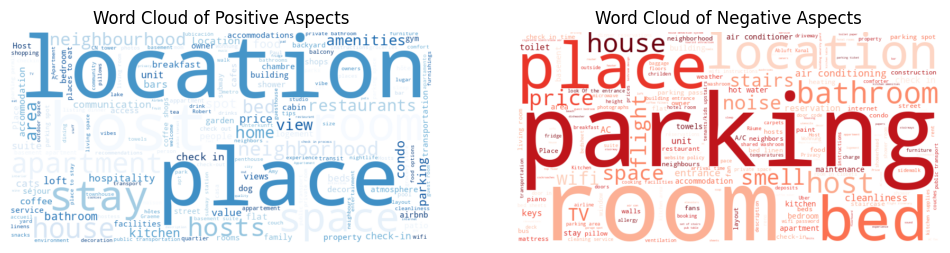

In [ ]:
# Read the results data into a DataFrame
results_path = '/content/drive/MyDrive/CMPE372Project/results_data_RQ2.csv'
results_RQ2 = pd.read_csv(results_path)

# Function to extract positive and negative aspects
def extract_sentiment_aspects(decoded_output, sentiment):
    aspects = decoded_output.split(', ')  # Split the string into aspects
    sentiment_aspects = [aspect.split(':')[0].strip() for aspect in aspects if sentiment in aspect]
    return sentiment_aspects

# Extract positive and negative aspects from the decoded_model_output column
results_RQ2['positive_aspects'] = results_RQ2['decoded_model_output'].apply(lambda x: extract_sentiment_aspects(x, 'positive'))
results_RQ2['negative_aspects'] = results_RQ2['decoded_model_output'].apply(lambda x: extract_sentiment_aspects(x, 'negative'))

# Create bag of words for positive and negative aspects
positive_bag_of_words = Counter()
negative_bag_of_words = Counter()

for positive_aspects in results_RQ2['positive_aspects']:
    positive_bag_of_words.update(positive_aspects)

for negative_aspects in results_RQ2['negative_aspects']:
    negative_bag_of_words.update(negative_aspects)

# Generate word clouds for positive and negative bags of words
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="Blues").generate_from_frequencies(positive_bag_of_words)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="Reds").generate_from_frequencies(negative_bag_of_words)

# Plot the word clouds
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Aspects')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative Aspects')
plt.axis('off')

plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Get shared aspects
shared_aspects = set(positive_bag_of_words.keys()) & set(negative_bag_of_words.keys())

# Initialize lists for statistically significant and non-significant aspects
significant_aspects = []
non_significant_aspects = []

# Perform chi-square test for each shared aspect
for aspect in shared_aspects:
    # Construct contingency table
    observed = [[positive_bag_of_words[aspect], 0], [0, negative_bag_of_words[aspect]]]

    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(observed)

    # Check for significance
    alpha = 0.05
    if p < alpha:
        # Determine the polarity associated with the aspect
        positive_freq = positive_bag_of_words.get(aspect, 0)
        negative_freq = negative_bag_of_words.get(aspect, 0)
        if positive_freq > negative_freq:
            polarity = 'positive'
            freq = positive_freq
        else:
            polarity = 'negative'
            freq = negative_freq

        # Append the aspect details to the list
        significant_aspects.append((aspect, polarity, freq))
    else:
        # Determine the polarity associated with the aspect
        positive_freq = positive_bag_of_words.get(aspect, 0)
        negative_freq = negative_bag_of_words.get(aspect, 0)
        if positive_freq > negative_freq:
            polarity = 'positive'
            freq = positive_freq
        else:
            polarity = 'negative'
            freq = negative_freq

        # Append the aspect details to the list
        non_significant_aspects.append((aspect, polarity, freq))

# Print significant and non-significant aspects
print("Statistically Significant Aspects:")
print(significant_aspects)
print()
print("Non-Statistically Significant Aspects:")
print(non_significant_aspects)

Statistically Significant Aspects:
[('Apartment', 'positive', 18), ('flight', 'negative', 8), ('air conditioning', 'positive', 9), ('stairs', 'negative', 6), ('living room', 'positive', 22), ('noise', 'negative', 7), ('stay', 'positive', 767), ('layout', 'positive', 11), ('Place', 'positive', 39), ('check-in', 'positive', 87), ('towels', 'positive', 21), ('beds', 'positive', 86), ('price', 'positive', 140), ('appartment', 'positive', 24), ('logement', 'positive', 36), ('decor', 'positive', 53), ('parking spot', 'positive', 25), ('instructions', 'positive', 18), ('check in time', 'positive', 8), ('place', 'positive', 3600), ('food', 'positive', 160), ('condo', 'positive', 196), ('entrance', 'positive', 6), ('parking', 'positive', 156), ('bathroom', 'positive', 141), ('public transport', 'positive', 17), ('balcony', 'positive', 23), ('wifi', 'positive', 25), ('Host', 'positive', 49), ('suite', 'positive', 109), ('bedroom', 'positive', 40), ('neighbors', 'positive', 14), ('bus', 'positive